### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
import re
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.model_selection import train_test_split
import matplotlib
matplotlib.use('tkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Importing the dataset

In [2]:
path ='/Users/maryrosejofelvillacampa/Desktop/datasets/astronomical_data.csv'
df = pd.read_csv(path)
df = pd.DataFrame(df)
df

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3042,0.0005,0.1542,16.6,0,Red,M
1,2600,0.0003,0.102,18.7,0,Red,M
2,2800,0.0002,,16.65,0,Red,M
3,1939,0.000138,0.103,20.06,0,Red,M
4,2840,,0.11,16.98,0,Red,M
...,...,...,...,...,...,...,...
234,38940,374830,1356,-9.93,5,Blue,O
235,30839,834042,1194,-10.63,5,Blue,O
236,8829,537493,1423,-10.73,5,White,A
237,9235,404940,1112,-11.23,5,White,A


### Data exploration

In [3]:
#converting columns "Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type" into numeric format
df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type"]] = \
df[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)", "Star type"]].apply(pd.to_numeric, errors='coerce')
df["Star color"] = pd.Categorical(df["Star color"])
df["Spectral Class"] = pd.Categorical(df["Spectral Class"])

#replacing empty cells for columns "Star color" and "Spectral Class" with NaN
df["Star color"] = df["Star color"].replace("\s", np.nan, regex=True)
df["Spectral Class"] = df["Spectral Class"].replace("\s", np.nan, regex=True)

#inspecting the dimension of the dataset
shape = df.shape
print(f"There are {shape[0]} rows by {shape[1]} columns.")

#checking for duplicated rows in the dataset
dupes = df.duplicated().sum()
if dupes == 0:
    print("There are no duplicated rows in the dataset.")
else:
    print(f"There are {dupes} duplicated rows in the dataset")

print("The number of empty cells are listed below per feature.")

#checking the null values for each column
nulls = df.isnull().sum()
print(nulls)


There are 239 rows by 7 columns.
There are no duplicated rows in the dataset.
The number of empty cells are listed below per feature.
Temperature (K)           2
Luminosity(L/Lo)          6
Radius(R/Ro)              7
Absolute magnitude(Mv)    5
Star type                 0
Star color                6
Spectral Class            2
dtype: int64


### Data preprocessing

#### Predictor variables

In [4]:
mean_temp = df["Temperature (K)"].mean() #gets the mean from the temperature values
df["Temperature (K)"] = df["Temperature (K)"].fillna(mean_temp) #filling the empty temperature cells with the mean temperature

mean_lum = df["Luminosity(L/Lo)"].mean() #gets the mean from the luminosity values
df["Luminosity(L/Lo)"] = df["Luminosity(L/Lo)"].fillna(mean_lum) #filling the empty luminosity cells with the mean luminosity

mean_mv = df["Absolute magnitude(Mv)"].mean() #gets the mean from the absolute magnitude values
df["Absolute magnitude(Mv)"] = df["Absolute magnitude(Mv)"].fillna(mean_mv) #filling the empty absolute magnitude cells with the mean absolute magnitude

mean_rad = df["Radius(R/Ro)"].mean() #gets the mean from the Radius values
df["Radius(R/Ro)"] = df["Radius(R/Ro)"].fillna(mean_rad) #filling the empty Radius cells with the mean Radius

#### Spectral Class

In [5]:
df = df.dropna(subset=["Spectral Class"]) #drops the the rows with empty values in the spectral class column

# ordinal encoding for spectral class feature 
df["Spectral Class"] = df["Spectral Class"].replace({
    "M": 0,
    "K": 1,
    "G": 2,
    "F": 3,
    "A": 4,
    "B": 5,
    "O": 6,
})
df["Spectral Class"] = pd.to_numeric(df["Spectral Class"])

df #prints the df to checks and see if the spectral class is converted from categorical to numerical values

/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/3226806235.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["Spectral Class"] = df["Spectral Class"].replace({
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/3226806235.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Spectral Class"] = df["Spectral Class"].replace({
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/3226806235.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3042.0,0.000500,0.154200,16.60,0,Red,0
1,2600.0,0.000300,0.102000,18.70,0,Red,0
2,2800.0,0.000200,238.393907,16.65,0,Red,0
3,1939.0,0.000138,0.103000,20.06,0,Red,0
4,2840.0,107266.981895,0.110000,16.98,0,Red,0
...,...,...,...,...,...,...,...
234,38940.0,374830.000000,1356.000000,-9.93,5,Blue,6
235,30839.0,834042.000000,1194.000000,-10.63,5,Blue,6
236,8829.0,537493.000000,1423.000000,-10.73,5,White,4
237,9235.0,404940.000000,1112.000000,-11.23,5,White,4


#### Star color

In [6]:
df["Star color"] = df["Star color"].replace("\s", np.nan, regex=True) #replacing empty values (white spaces) in cells with NaN

features = ['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)'] #assigning features for imputing the star color missing values

df_missing = df[df["Star color"].isnull()] #creates a dataset for the rows with missing star color values
df_not_missing = df[df["Star color"].notnull()] #creates a dataset for the rows with present star color values

df_not_missing["Star color"] = pd.Categorical(df_not_missing["Star color"]).codes 

#knn imputer for predicting the star color values 
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(df_not_missing[features], df_not_missing["Star color"])

df_missing["Star color"] = knn.predict(df_missing[features])

df['Star color'] = pd.Categorical(df['Star color'])
df['Star color'] = pd.Categorical(df['Star color'], categories=pd.Categorical(df_not_missing['Star color']).categories)

dfn = pd.concat([df_not_missing, df_missing]).sort_index()

df = pd.DataFrame(dfn)
df

/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/1367713166.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Star color"] = df["Star color"].replace("\s", np.nan, regex=True) #replacing empty values (white spaces) in cells with NaN
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/ipykernel_3558/1367713166.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_not_missing["Star color"] = pd.Categorical(df_not_missing["Star color"]).codes
/var/folders/j4/s0vszz0s5x7cw3y1602v15cc0000gn/T/

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3042.0,0.000500,0.154200,16.60,0,3,0
1,2600.0,0.000300,0.102000,18.70,0,3,0
2,2800.0,0.000200,238.393907,16.65,0,3,0
3,1939.0,0.000138,0.103000,20.06,0,3,0
4,2840.0,107266.981895,0.110000,16.98,0,3,0
...,...,...,...,...,...,...,...
234,38940.0,374830.000000,1356.000000,-9.93,5,1,6
235,30839.0,834042.000000,1194.000000,-10.63,5,1,6
236,8829.0,537493.000000,1423.000000,-10.73,5,4,4
237,9235.0,404940.000000,1112.000000,-11.23,5,4,4


In [7]:
nulls = df.isnull().sum()
print(nulls)

Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


### Checking assumptions

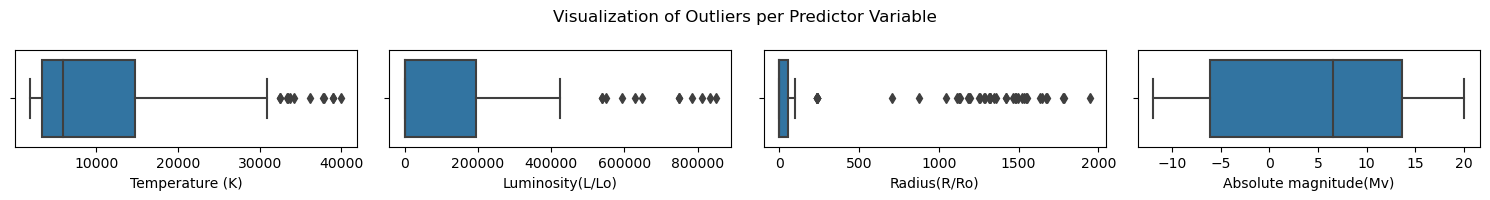

In [15]:
#box plot for checking outliers
plt.figure(figsize=(15,2))

plt.subplot(1,4,1)
sns.boxplot(x=df["Temperature (K)"])

plt.subplot(1,4,2)
sns.boxplot(x=df["Luminosity(L/Lo)"])

plt.subplot(1,4,3)
sns.boxplot(x=df["Radius(R/Ro)"])

plt.subplot(1,4,4)
sns.boxplot(x=df["Absolute magnitude(Mv)"])

plt.suptitle("Visualization of Outliers per Predictor Variable")
plt.tight_layout()
plt.show()

Spectral Class
0    109
5     46
6     39
4     19
3     17
1      6
2      1
Name: count, dtype: int64


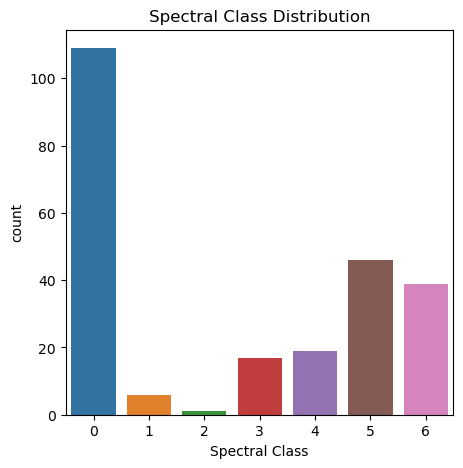

In [16]:
class_distribution = df["Spectral Class"].value_counts()
print(class_distribution)

plt.figure(figsize=(5,5))
sns.countplot(x=df["Spectral Class"], data=df)
plt.title("Spectral Class Distribution")
plt.show()

In [22]:
df['log_temperature'] = np.log(df["Temperature (K)"] + 1)
df['log_luminosity'] = np.log(df["Luminosity(L/Lo)"] + 1)
df['log_radius'] = np.log(df["Radius(R/Ro)"] + 1)

x_features = df[['log_temperature', 'log_luminosity', 'log_radius', 'Absolute magnitude(Mv)']]  # Use transformed features
y_features = df["Spectral Class"]  # Target variable

scale = StandardScaler()
scaledx_features = scale.fit_transform(x_features)

x_train, x_test, y_train, y_test = train_test_split(scaledx_features, y_features, test_size=0.2, random_state=42)

#initialize KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.83


/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/maryrosejofelvillacampa/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


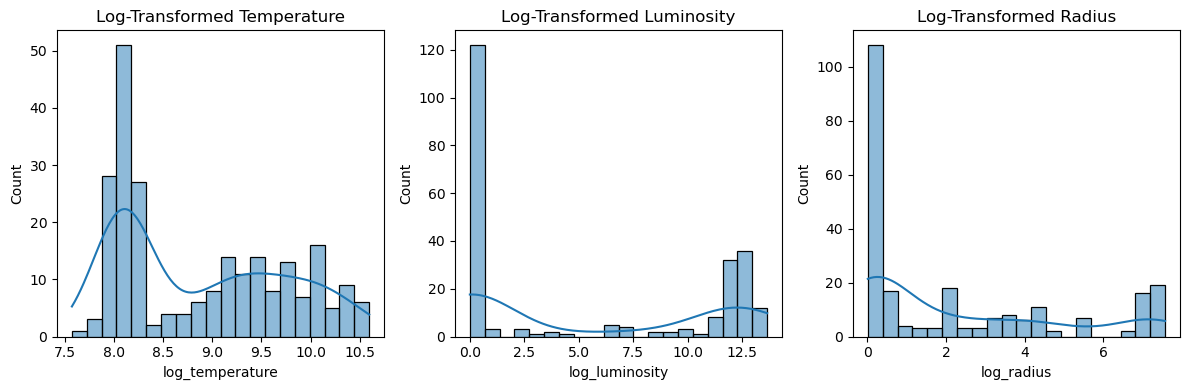

In [24]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df['log_temperature'], kde=True, bins=20)
plt.title('Log-Transformed Temperature')

plt.subplot(1, 3, 2)
sns.histplot(df['log_luminosity'], kde=True, bins=20)
plt.title('Log-Transformed Luminosity')

plt.subplot(1, 3, 3)
sns.histplot(df['log_radius'], kde=True, bins=20)
plt.title('Log-Transformed Radius')

plt.tight_layout()
plt.show()

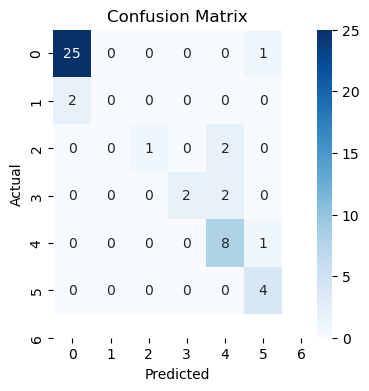

In [28]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_features), yticklabels=np.unique(y_features))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Data processing

In [59]:
x_features = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)']] #define x features (predictors)
y_features = df["Spectral Class"] #defines y feature (value that will be predicted)

scaledx_features = scale.fit_transform(x_features) #scales the x features for the values to be comparable
scaledx_features = pd.DataFrame(scaledx_features, columns=["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]) #turns the scaled array data into a dataframe

x_train, x_test, y_train, y_test = train_test_split(scaledx_features, y_features, test_size=0.2, random_state=42) #splits the training (80%) and test 20% (sets) 

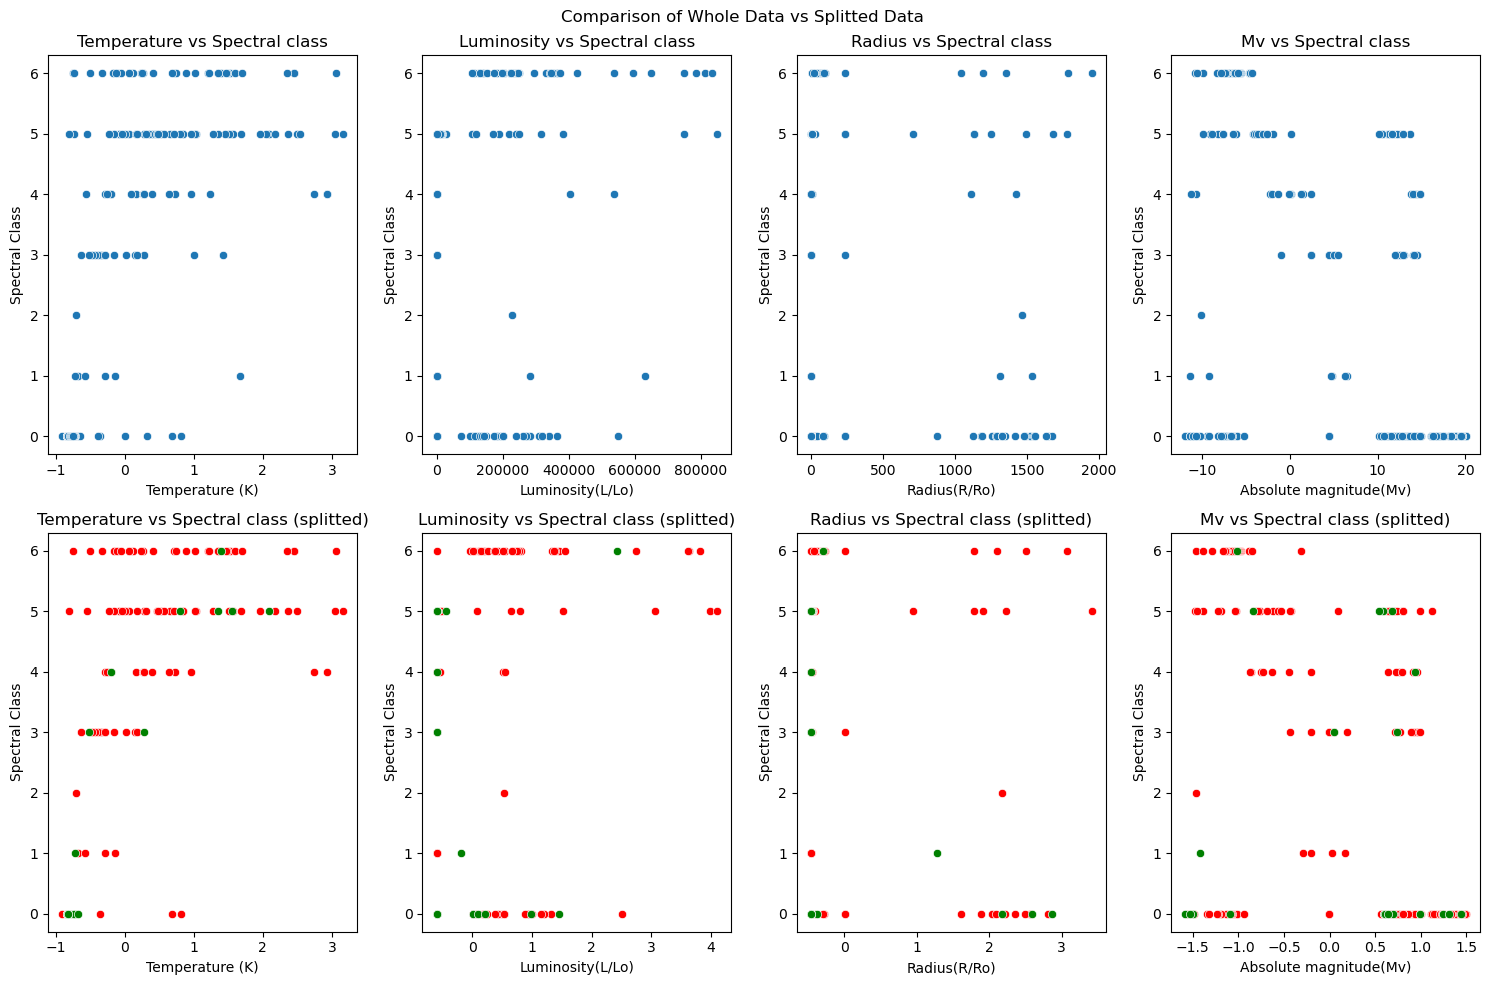

In [60]:
plt.figure(figsize=(15, 10)) #size of the entire plot figure

#plot 1 – plots temperature vs spectral class (data is not yet splitted)
plt.subplot(2,4,1)
plt.title("Temperature vs Spectral class")
sns.scatterplot(x=scaledx_features["Temperature (K)"], y=y_features)

#plot 2 – plots luminosity vs spectral class (data is not yet splitted)
plt.subplot(2,4,2)
plt.title("Luminosity vs Spectral class")
sns.scatterplot(x=df["Luminosity(L/Lo)"], y=df["Spectral Class"])

#plot 3 – plots radius vs spectral class (data is not yet splitted)
plt.subplot(2,4,3)
plt.title("Radius vs Spectral class")
sns.scatterplot(x=df["Radius(R/Ro)"], y=df["Spectral Class"])

#plot 4 – plots absolute magnitude vs spectral class (data is not yet splitted)
plt.subplot(2,4,4)
plt.title("Mv vs Spectral class")
sns.scatterplot(x=df["Absolute magnitude(Mv)"], y=df["Spectral Class"])

#plot 5 – plots temperature vs spectral class (data is splitted, training and test sets are plotted in the same scatter plot in different colors)
plt.subplot(2,4,5)
plt.title("Temperature vs Spectral class (splitted)")
sns.scatterplot(x=x_train["Temperature (K)"], y=y_train, color='red')
sns.scatterplot(x=x_test["Temperature (K)"], y=y_test, color='green')

#plot 6 – plots luminosity vs spectral class (data is splitted, training and test sets are plotted in the same scatter plot in different colors)
plt.subplot(2,4,6)
plt.title("Luminosity vs Spectral class (splitted)")
sns.scatterplot(x=x_train["Luminosity(L/Lo)"], y=y_train, color='red')
sns.scatterplot(x=x_test["Luminosity(L/Lo)"], y=y_test, color='green')

#plot 7 – plots radius vs spectral class (data is splitted, training and test sets are plotted in the same scatter plot in different colors)
plt.subplot(2,4,7)
plt.title("Radius vs Spectral class (splitted)")
sns.scatterplot(x=x_train["Radius(R/Ro)"], y=y_train, color='red')
sns.scatterplot(x=x_test["Radius(R/Ro)"], y=y_test, color='green')

#plot 8 – plots absolute magnitude vs spectral class (data is splitted, training and test sets are plotted in the same scatter plot in different colors)
plt.subplot(2,4,8)
plt.title("Mv vs Spectral class (splitted)")
sns.scatterplot(x=x_train["Absolute magnitude(Mv)"], y=y_train, color='red')
sns.scatterplot(x=x_test["Absolute magnitude(Mv)"], y=y_test, color='green')

plt.suptitle("Comparison of Whole Data vs Splitted Data ")
plt.tight_layout()
plt.show()

In [61]:
#checks the correlation of each variable with each other
corr_view = df[['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolute magnitude(Mv)', 'Spectral Class']].corr()
print(corr_view)

                        Temperature (K)  ...  Spectral Class
Temperature (K)                1.000000  ...        0.812943
Luminosity(L/Lo)               0.398854  ...        0.337186
Radius(R/Ro)                   0.056543  ...       -0.059152
Absolute magnitude(Mv)        -0.435199  ...       -0.426575
Spectral Class                 0.812943  ...        1.000000

[5 rows x 5 columns]


### Data modeling

In [62]:
model = linear_model.LinearRegression() #creates a regression object
model.fit(x_train, y_train) #fits the training sets into the regression object

y_pred = model.predict(x_test) #the model is used to predict y values using the x_test values and stores it in a y_pred variable

### Model assessment

In [63]:
MAE = mean_absolute_error(y_test, y_pred) #gets the mean absolute error
MSE = root_mean_squared_error(y_test, y_pred) #gets the root mean squared error
rsquared = r2_score(y_test, y_pred) #gets the r-squared calculation

print(f"Mean Absolute Error: {MAE:.2f}")
print(f"Root Mean Squared Error: {MSE:.2f}")
print(f"R-squared: {rsquared:.2f}")

Mean Absolute Error: 1.07
Root Mean Squared Error: 1.34
R-squared: 0.68
